Print out the version of python

In [1]:
!python --version

Python 3.7.12


In [2]:
print("AgriApp 2022!")

AgriApp 2022!


<h1>BellPepper Disease Classification</h1>
<h3>
I. Data preparation </h3>
  <h4>1.1 Load dataset from github</h4>
 <h4> 1.2 Data preprocessing </h4>

<h3>II. Configure CNN model</h3>
<h3>III. Evaluating CNN model on testing and validating set</h3>
<h3>IV. Save the model </h3>


<h4>1.1 Add database to your local virtual machine. Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village</h4>

In [3]:
!git clone https://github.com/TinaNgo2021/AgriApp2022.git

Cloning into 'AgriApp2022'...
remote: Enumerating objects: 15685, done.
remote: Counting objects: 100% (15685/15685), done.
remote: Compressing objects: 100% (15677/15677), done.
remote: Total 15685 (delta 7), reused 15679 (delta 4), pack-reused 0
Receiving objects: 100% (15685/15685), 258.22 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (6976/6976), done.


<h4>1.2 Data Preprocessing</h4>
<h5>1.2.1 Import Libraries </h5>

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

<h5> 1.2.2 Setup the variables <h5>

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=25
n_classes = 2

https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
<h2>Import data into tensorflow dataset object</h2>
<h4>Tensorflow API image_dataset_from_directory is selected to load all images in tensorflow dataset:</h4>



In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AgriApp2022/BellPepper",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


<h5>Seed: Optional random seed for shuffling and transformations.</h5>
<h5>Batch_size: Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).</h5>
<h5>The batch size is a number of samples processed before the model is updated</h5>

<h4>More about tensorflow dataset- please follow this tutorial</h4>
<h5>https://www.youtube.com/embed/VFEOskzhhbc</h5>

In [7]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

<h4>Print out sample images from  Bell Pepper dataset</h4>

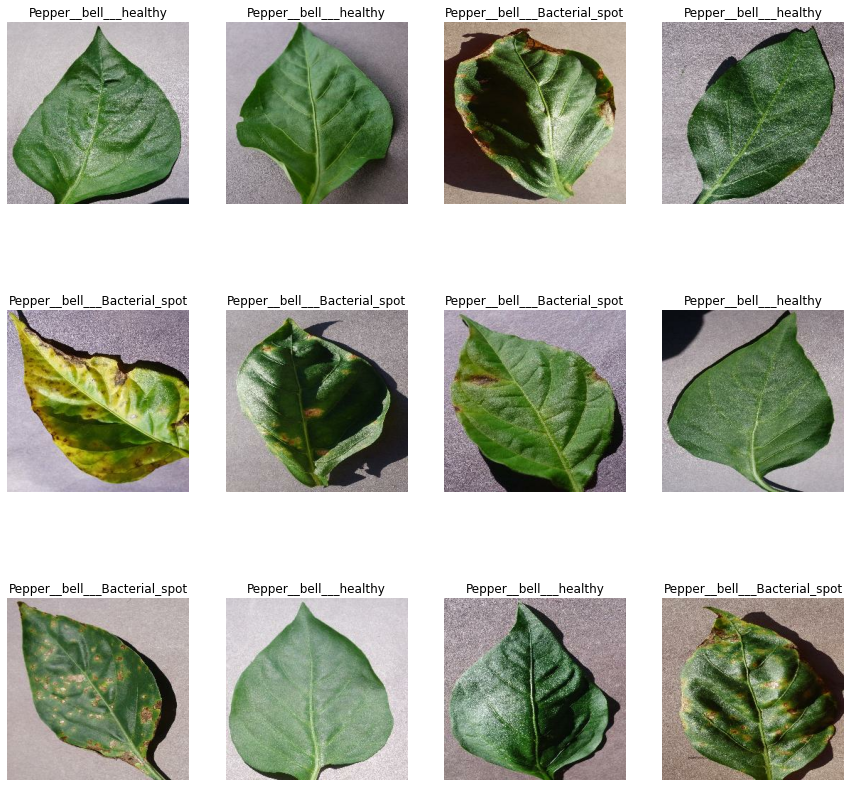

In [8]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

<h3>Split dataset into training, testing and validating set with ratio 80, 10, 10%, respectively</h3>
<h4>Source: https://gist.github.com/angeligareta/e3332c7a955dba8eaca71bf388d028c2</h4>

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

<h3>call get dataset partition function</h3>

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

<h4>For more image augmentation methods</h4>
https://www.tensorflow.org/tutorials/images/data_augmentation

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


model = models.Sequential([
    resize_and_rescale,
    # Convolutional layer and maxpool layer 1
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    # Convolutional layer and maxpool layer 2
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Convolutional layer and maxpool layer 3
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # Convolutional layer and maxpool layer 4
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # Convolutional layer and maxpool layer 5
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # Convolutional layer and maxpool layer 6
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (32, 246016)             

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/25
62/62 [==============================] - 41s 440ms/step - loss: 1.3400 - accuracy: 0.6935 - val_loss: 0.3012 - val_accuracy: 0.8527
Epoch 2/25
62/62 [==============================] - 31s 449ms/step - loss: 0.3678 - accuracy: 0.8407 - val_loss: 0.4498 - val_accuracy: 0.8348
Epoch 3/25
62/62 [==============================] - 28s 419ms/step - loss: 0.2654 - accuracy: 0.8930 - val_loss: 0.2830 - val_accuracy: 0.8839
Epoch 4/25
62/62 [==============================] - 29s 437ms/step - loss: 0.2330 - accuracy: 0.9103 - val_loss: 0.4695 - val_accuracy: 0.7946
Epoch 5/25
62/62 [==============================] - 29s 430ms/step - loss: 0.2119 - accuracy: 0.9226 - val_loss: 0.1658 - val_accuracy: 0.9241
Epoch 6/25
62/62 [==============================] - 29s 427ms/step - loss: 0.2169 - accuracy: 0.9210 - val_loss: 0.3337 - val_accuracy: 0.8661
Epoch 7/25
62/62 [==============================] - 29s 424ms/step - loss: 0.1591 - accuracy: 0.9419 - val_loss: 0.1695 - val_accuracy: 0.9420

In [18]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 3s 46ms/step - loss: 0.0587 - accuracy: 0.9722


In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

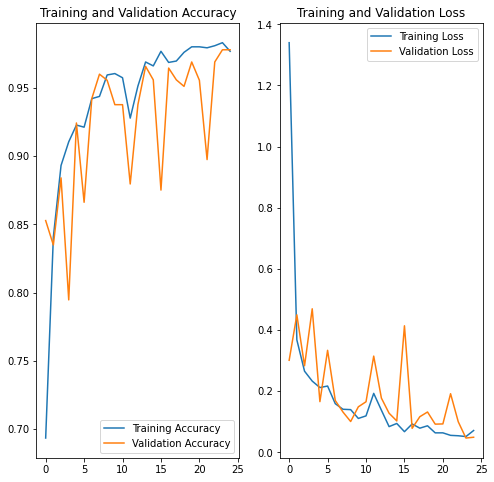

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___Bacterial_spot
predicted label: Pepper__bell___Bacterial_spot


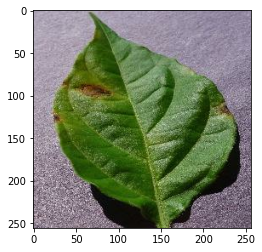

In [21]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

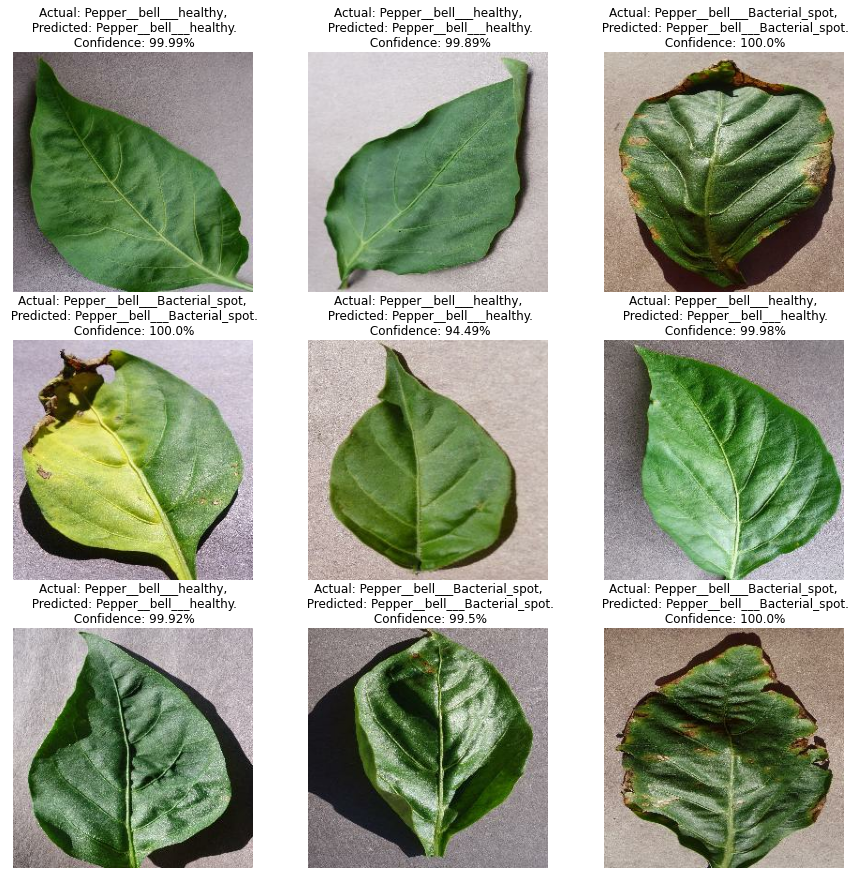

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [24]:
model.save("BellPepper_10.h5")

In [25]:
# from google.colab import files
# files.download('BellPepper_10.h5')

References
<h5>https://www.kaggle.com/abdallahalidev/plantvillage-dataset</h5>
<h5>https://github.com/codebasics/potato-disease-classification<h5>